<a href="https://colab.research.google.com/github/anujeet98/heart-prediction-ml/blob/master/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

     |████████████████████████████████| 62.6MB 638kB/s 


In [0]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import train & test data 
train = pd.read_csv('train_values.csv')
test = pd.read_csv('test_values.csv')
data1=pd.read_csv('train_labels.csv')

In [4]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [0]:
data=pd.concat([train,data1],axis=1)

In [6]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


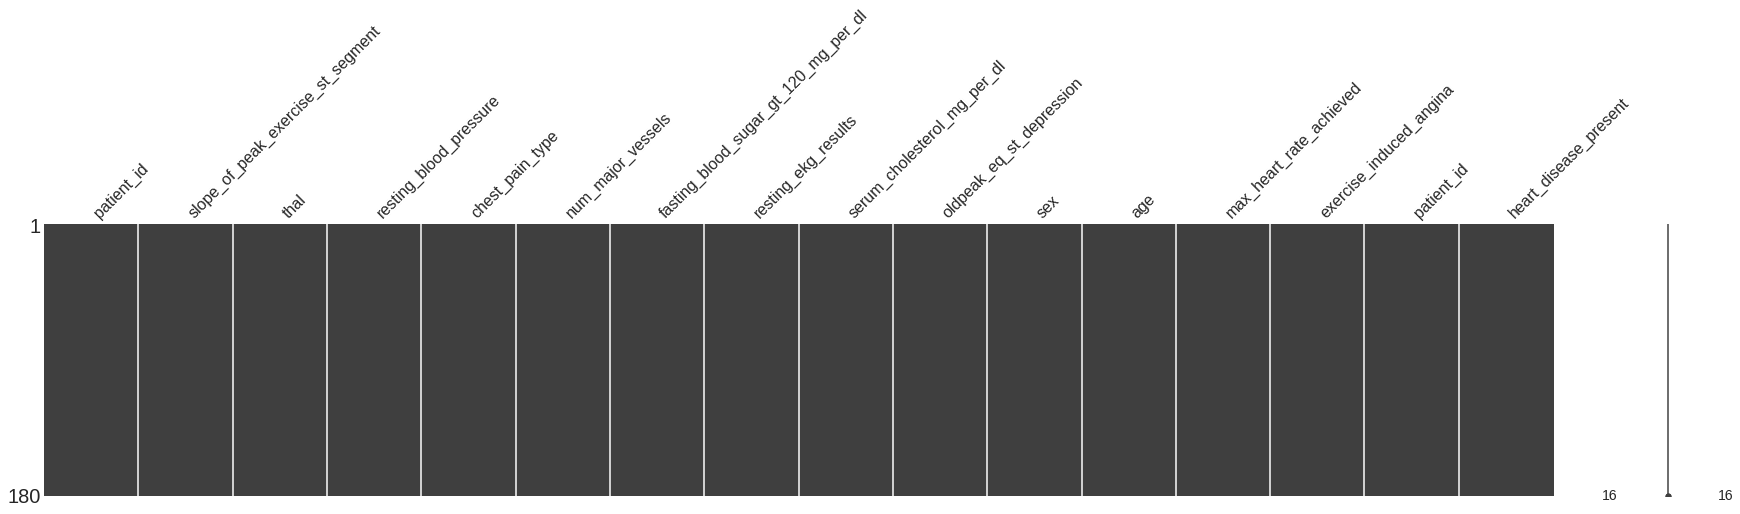

In [7]:
missingno.matrix(data, figsize = (30,5))

In [8]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
patient_id                              0
heart_disease_present                   0
dtype: int64

thal

In [9]:
data['heart_disease_present'].value_counts()
#count of patient categories

0    100
1     80
Name: heart_disease_present, dtype: int64

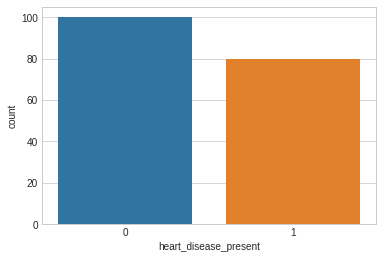

In [10]:
sns.countplot(x='heart_disease_present',data=data)

In [0]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [12]:
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
patient_id                               object
heart_disease_present                     int64
dtype: object

# Feature thal

In [13]:
data.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

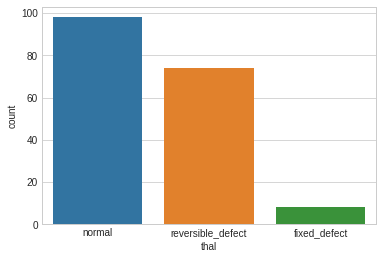

In [14]:
sns.countplot(x='thal', data=data)

In [0]:
df_bin['thal'] = data['thal']
df_con['thal'] = data['thal']

In [16]:
df_bin.head()

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect


# feature exercise_induced_angina

In [17]:
data.exercise_induced_angina.value_counts()

0    123
1     57
Name: exercise_induced_angina, dtype: int64

In [0]:
df_bin['exercise_induced_angina'] = data['exercise_induced_angina']
df_con['exercise_induced_angina'] = data['exercise_induced_angina']

In [19]:
df_bin.head(5)

,thal,exercise_induced_angina
0,normal,0
1,normal,0
2,normal,1
3,reversible_defect,0
4,reversible_defect,0


# Feature chest_pain_type

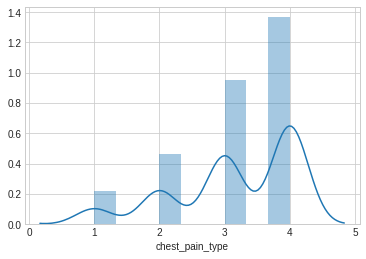

In [20]:
sns.distplot(data.chest_pain_type)

In [0]:
df_bin['chest_pain_type'] = data['chest_pain_type']
df_con['chest_pain_type'] = data['chest_pain_type']


In [22]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type
0,normal,0,2
1,normal,0,3
2,normal,1,4
3,reversible_defect,0,4
4,reversible_defect,0,1


# feature num_major_vessels 

In [23]:
data.num_major_vessels.value_counts()

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

In [0]:
df_bin['num_major_vessels']=data['num_major_vessels']
df_con['num_major_vessels']=data['num_major_vessels']

In [25]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels
0,normal,0,2,0
1,normal,0,3,0
2,normal,1,4,3
3,reversible_defect,0,4,0
4,reversible_defect,0,1,0


# feature fasting_blood_sugar_gt_120_mg_per_dl

In [26]:
data.fasting_blood_sugar_gt_120_mg_per_dl.value_counts()

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

In [0]:
df_bin['fasting_blood_sugar_gt_120_mg_per_dl']=data['fasting_blood_sugar_gt_120_mg_per_dl']
df_con['fasting_blood_sugar_gt_120_mg_per_dl']=data['fasting_blood_sugar_gt_120_mg_per_dl']

In [28]:
df_bin.head(10)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl
0,normal,0,2,0,0
1,normal,0,3,0,0
2,normal,1,4,3,0
3,reversible_defect,0,4,0,0
4,reversible_defect,0,1,0,0
5,normal,0,3,0,0
6,reversible_defect,0,4,2,0
7,fixed_defect,1,4,1,0
8,reversible_defect,1,4,0,0
9,normal,0,3,0,0


# feature resting_ekg_results

In [29]:
data.resting_ekg_results.value_counts()


#1 has less value

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

In [0]:
df_bin['resting_ekg_results']=data['resting_ekg_results']
df_con['resting_ekg_results']=data['resting_ekg_results']

In [31]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results
0,normal,0,2,0,0,2
1,normal,0,3,0,0,0
2,normal,1,4,3,0,2
3,reversible_defect,0,4,0,0,0
4,reversible_defect,0,1,0,0,2


# feature heart_disease_present

In [32]:
data.heart_disease_present.value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [0]:
df_bin['heart_disease_present']=data['heart_disease_present']
df_con['heart_disease_present']=data['heart_disease_present']

In [34]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present
0,normal,0,2,0,0,2,0
1,normal,0,3,0,0,0,0
2,normal,1,4,3,0,2,1
3,reversible_defect,0,4,0,0,0,1
4,reversible_defect,0,1,0,0,2,0


# feature sex

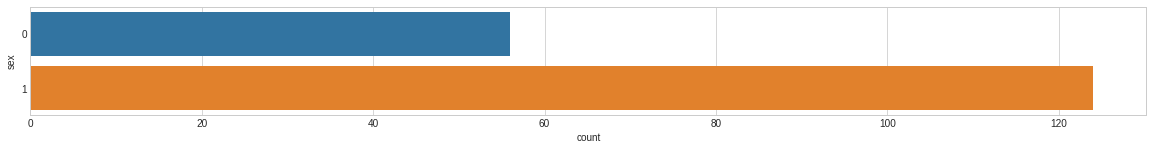

In [35]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 2))
sns.countplot(y="sex", data=data);

In [36]:
data.sex.value_counts()

1    124
0     56
Name: sex, dtype: int64

In [0]:
df_bin['sex']=data['sex']
df_con['sex']=data['sex']

In [38]:
df_bin.head(5)

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex
0,normal,0,2,0,0,2,0,1
1,normal,0,3,0,0,0,0,0
2,normal,1,4,3,0,2,1,1
3,reversible_defect,0,4,0,0,0,1,1
4,reversible_defect,0,1,0,0,2,0,1


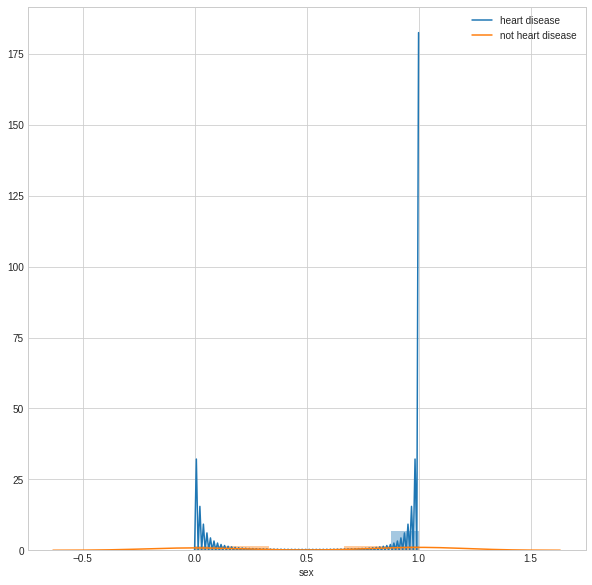

In [39]:
# How does the Sex variable look compared to heart_-present?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['heart_disease_present'] == 1]['sex'], kde_kws={'label': 'heart disease'});
sns.distplot(df_bin.loc[df_bin['heart_disease_present'] == 0]['sex'], kde_kws={'label': 'not heart disease'});

# data distribution

In [40]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# feature age

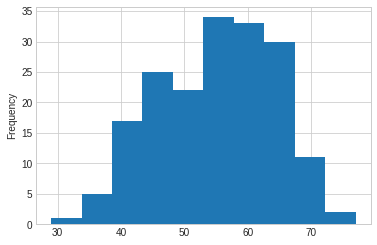

In [41]:
data.age.plot.hist()

In [0]:
df_con['age'] = data['age'] 
df_bin['age'] = pd.cut(data['age'], bins=5)

In [43]:
df_bin.age.value_counts()

(57.8, 67.4]      63
(48.2, 57.8]      56
(38.6, 48.2]      42
(67.4, 77.0]      13
(28.952, 38.6]     6
Name: age, dtype: int64

In [44]:
data[data["heart_disease_present"]==0][data["sex"]==0][data["thal"]=="normal"]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,1r508r,0
13,zlyac8,2,normal,138,4,0,0,2,236,0.2,0,45,152,1,zlyac8,0
16,qyrkxn,2,normal,130,2,0,0,2,234,0.6,0,45,175,0,qyrkxn,0
20,cvux3j,1,normal,160,2,2,0,0,302,0.4,0,71,162,0,cvux3j,0
22,jhdvtb,1,normal,106,4,2,0,0,223,0.3,0,67,142,0,jhdvtb,0
25,gla0im,2,normal,120,3,0,0,2,211,1.5,0,68,115,0,gla0im,0
26,zzmfh7,1,normal,128,4,1,0,2,303,0.0,0,57,159,0,zzmfh7,0
33,0n5fu0,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0n5fu0,0
37,tpuevg,1,normal,124,4,0,0,0,209,0.0,0,62,163,0,tpuevg,0


# feature resting_blood_pressure

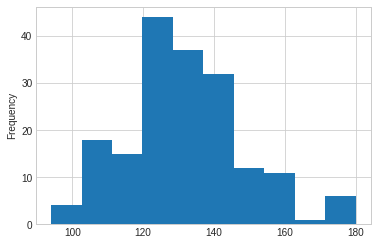

In [45]:
data.resting_blood_pressure.plot.hist()

In [46]:
  data['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142])

In [0]:
df_con['resting_blood_pressure'] = data['resting_blood_pressure'] 
df_bin['resting_blood_pressure'] = pd.cut(data['resting_blood_pressure'], bins=6)

In [48]:
df_bin.resting_blood_pressure.value_counts()

(122.667, 137.0]      59
(108.333, 122.667]    48
(137.0, 151.333]      42
(151.333, 165.667]    13
(93.914, 108.333]     11
(165.667, 180.0]       7
Name: resting_blood_pressure, dtype: int64

# feature serum_cholesterol_mg_per_dl

In [49]:
data['serum_cholesterol_mg_per_dl'].unique()

array([308, 214, 304, 223, 270, 180, 258, 276, 326, 219, 302, 226, 335,
       236, 231, 200, 234, 253, 204, 319, 233, 228, 245, 211, 303, 205,
       185, 175, 225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252,
       265, 417, 267, 261, 149, 281, 311, 315, 330, 256, 239, 295, 197,
       564, 305, 283, 160, 254, 282, 322, 250, 188, 220, 199, 215, 218,
       196, 266, 229, 259, 268, 177, 168, 262, 271, 299, 293, 141, 277,
       212, 321, 294, 313, 232, 289, 213, 274, 263, 244, 298, 172, 353,
       210, 192, 246, 286, 360, 174, 227, 248, 224, 300, 235, 217, 193,
       167, 216, 195, 309, 273, 198, 290, 275, 206, 164, 207, 249, 327,
       201])

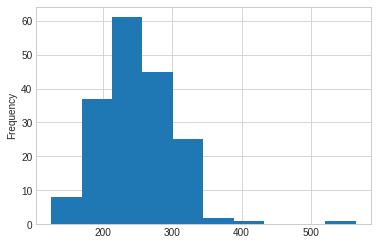

In [50]:
data.serum_cholesterol_mg_per_dl.plot.hist()

In [0]:
df_con['serum_cholesterol_mg_per_dl'] = data['serum_cholesterol_mg_per_dl'] 
df_bin['serum_cholesterol_mg_per_dl'] = pd.cut(data['serum_cholesterol_mg_per_dl'], bins=5)

In [52]:
df_bin.serum_cholesterol_mg_per_dl.value_counts()

(213.6, 301.2]      106
(125.562, 213.6]     45
(301.2, 388.8]       27
(476.4, 564.0]        1
(388.8, 476.4]        1
Name: serum_cholesterol_mg_per_dl, dtype: int64

# feature max_heart_rate_achieved

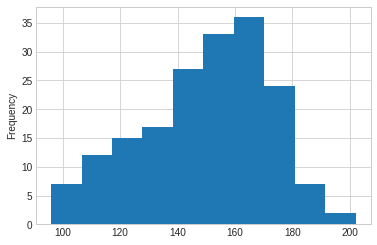

In [53]:
data.max_heart_rate_achieved.plot.hist()

In [0]:
df_con['max_heart_rate_achieved'] = data['max_heart_rate_achieved'] 
df_bin['max_heart_rate_achieved'] = pd.cut(data['max_heart_rate_achieved'], bins=5)

In [55]:
df_bin.max_heart_rate_achieved.value_counts()

(159.6, 180.8]     60
(138.4, 159.6]     60
(117.2, 138.4]     32
(95.894, 117.2]    19
(180.8, 202.0]      9
Name: max_heart_rate_achieved, dtype: int64

# feature oldpeak_eq_st_depression

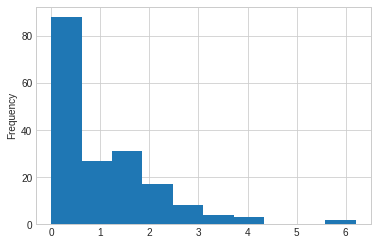

In [56]:
data.oldpeak_eq_st_depression.plot.hist()

In [0]:
df_con['oldpeak_eq_st_depression'] = data['oldpeak_eq_st_depression'] 
df_bin['oldpeak_eq_st_depression'] = pd.cut(data['oldpeak_eq_st_depression'], bins=9)

In [58]:
df_bin.oldpeak_eq_st_depression.value_counts()

(-0.0062, 0.689]    88
(1.378, 2.067]      38
(0.689, 1.378]      28
(2.067, 2.756]      13
(2.756, 3.444]       8
(5.511, 6.2]         2
(4.133, 4.822]       2
(3.444, 4.133]       1
(4.822, 5.511]       0
Name: oldpeak_eq_st_depression, dtype: int64

In [59]:
df_bin.head()

,thal,exercise_induced_angina,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,heart_disease_present,sex,age,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,oldpeak_eq_st_depression
0,normal,0,2,0,0,2,0,1,"(38.6, 48.2]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.689]"
1,normal,0,3,0,0,0,0,0,"(48.2, 57.8]","(108.333, 122.667]","(213.6, 301.2]","(138.4, 159.6]","(1.378, 2.067]"
2,normal,1,4,3,0,2,1,1,"(67.4, 77.0]","(122.667, 137.0]","(301.2, 388.8]","(159.6, 180.8]","(-0.0062, 0.689]"
3,reversible_defect,0,4,0,0,0,1,1,"(38.6, 48.2]","(151.333, 165.667]","(213.6, 301.2]","(180.8, 202.0]","(-0.0062, 0.689]"
4,reversible_defect,0,1,0,0,2,0,1,"(57.8, 67.4]","(165.667, 180.0]","(213.6, 301.2]","(138.4, 159.6]","(4.133, 4.822]"


# feature slope_of_peak_exercise_st_segment

In [91]:
data.slope_of_peak_exercise_st_segment.value_counts()

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

In [0]:
df_bin['slope_of_peak_exercise_st_segment']=data['slope_of_peak_exercise_st_segment']
df_con['slope_of_peak_exercise_st_segment']=data['slope_of_peak_exercise_st_segment']

# feature encoding one hot

In [93]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,heart_disease_present_0,heart_disease_present_1,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]",slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Start Building Machine Learning Models

In [0]:

# Seclect the dataframe we want to use first for predictions
selected_df = df_bin_enc

In [0]:
selected_df=selected_df.drop('heart_disease_present_1', axis=1)

In [0]:
selected_df=selected_df.drop('heart_disease_present_0', axis=1)

In [0]:
selected_df=pd.concat([selected_df,data1],axis=1)

In [0]:
selected_df=selected_df.drop('patient_id', axis=1)

In [99]:
selected_df.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]",slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,heart_disease_present
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:

# Split the dataframe into data and labels
x_train = selected_df.drop('heart_disease_present', axis=1) # data
y_train = selected_df.heart_disease_present # labels

In [101]:
# Shape of the data (without labels)
x_train.shape

(180, 53)

In [102]:
x_train.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]",slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [103]:
y_train.shape

(180,)

In [104]:
y_train.head()

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

# Define a function to fit machine learning algorithms

In [0]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# logistic reg

In [106]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 88.89
Accuracy CV 10-Fold: 82.22
Running Time: 0:00:01.356210


In [107]:
x_train.columns.tolist()

['thal_fixed_defect',
 'thal_normal',
 'thal_reversible_defect',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'chest_pain_type_4',
 'num_major_vessels_0',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3',
 'fasting_blood_sugar_gt_120_mg_per_dl_0',
 'fasting_blood_sugar_gt_120_mg_per_dl_1',
 'resting_ekg_results_0',
 'resting_ekg_results_1',
 'resting_ekg_results_2',
 'sex_0',
 'sex_1',
 'age_(28.952, 38.6]',
 'age_(38.6, 48.2]',
 'age_(48.2, 57.8]',
 'age_(57.8, 67.4]',
 'age_(67.4, 77.0]',
 'resting_blood_pressure_(93.914, 108.333]',
 'resting_blood_pressure_(108.333, 122.667]',
 'resting_blood_pressure_(122.667, 137.0]',
 'resting_blood_pressure_(137.0, 151.333]',
 'resting_blood_pressure_(151.333, 165.667]',
 'resting_blood_pressure_(165.667, 180.0]',
 'serum_cholesterol_mg_per_dl_(125.562, 213.6]',
 'serum_cholesterol_mg_per_dl_(213.6, 301.2]',
 'serum_cholesterol_mg_per_dl_(301.

In [108]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 86.11
Accuracy CV 10-Fold: 80.56
Running Time: 0:00:00.078395


In [109]:

# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 72.22
Accuracy CV 10-Fold: 71.11
Running Time: 0:00:00.050557


In [110]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 91.11
Accuracy CV 10-Fold: 80.0
Running Time: 0:00:00.104237


In [112]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 92.22
Accuracy CV 10-Fold: 76.67
Running Time: 0:00:00.082939


In [113]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 72.22
Running Time: 0:00:00.067568


In [115]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 78.33
Running Time: 0:00:00.660073


In [117]:
# Define the categorical features for the CatBoost model
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [0]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(x_train, 
                  y_train,
                  cat_features)

In [119]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)

Learning rate set to 0.010313


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6873988	total: 85.1ms	remaining: 1m 25s
1:	learn: 0.6819549	total: 121ms	remaining: 1m
2:	learn: 0.6733722	total: 151ms	remaining: 50.2s
3:	learn: 0.6696437	total: 181ms	remaining: 45s
4:	learn: 0.6645074	total: 192ms	remaining: 38.2s
5:	learn: 0.6591657	total: 203ms	remaining: 33.6s
6:	learn: 0.6544040	total: 217ms	remaining: 30.7s
7:	learn: 0.6496013	total: 229ms	remaining: 28.4s
8:	learn: 0.6443600	total: 242ms	remaining: 26.6s
9:	learn: 0.6398568	total: 255ms	remaining: 25.3s
10:	learn: 0.6341154	total: 269ms	remaining: 24.2s
11:	learn: 0.6295675	total: 282ms	remaining: 23.2s
12:	learn: 0.6255254	total: 292ms	remaining: 22.2s
13:	learn: 0.6204971	total: 305ms	remaining: 21.5s
14:	learn: 0.6136754	total: 316ms	remaining: 20.8s
15:	learn: 0.6082975	total: 329ms	remaining: 20.3s
16:	learn: 0.6020139	total: 354ms	remaining: 20.5s
17:	learn: 0.5990618	total: 369ms	remaining: 20.2s
18:	learn: 0.5954533	total: 390ms	remaining: 20.1s
19:	learn: 0.5906977	total: 405ms	remaining:

In [120]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6776541	test: 0.6832327	best: 0.6832327 (0)	total: 428ms	remaining: 7m 7s
1:	learn: 0.6607971	test: 0.6694797	best: 0.6694797 (1)	total: 733ms	remaining: 6m 5s
2:	learn: 0.6488979	test: 0.6580373	best: 0.6580373 (2)	total: 1.01s	remaining: 5m 37s
3:	learn: 0.6352305	test: 0.6484870	best: 0.6484870 (3)	total: 1.31s	remaining: 5m 25s
4:	learn: 0.6197472	test: 0.6380098	best: 0.6380098 (4)	total: 1.61s	remaining: 5m 21s
5:	learn: 0.6083045	test: 0.6274643	best: 0.6274643 (5)	total: 1.94s	remaining: 5m 21s
6:	learn: 0.5952531	test: 0.6187495	best: 0.6187495 (6)	total: 2.25s	remaining: 5m 19s
7:	learn: 0.5811484	test: 0.6089894	best: 0.6089894 (7)	total: 2.58s	remaining: 5m 19s
8:	learn: 0.5686906	test: 0.6023181	best: 0.6023181 (8)	total: 2.9s	remaining: 5m 19s
9:	learn: 0.5573460	test: 0.5930961	best: 0.5930961 (9)	total: 3.2s	remaining: 5m 16s
10:	learn: 0.5476388	test: 0.5863789	best: 0.5863789 (10)	total: 3.49s	remaining: 5m 14s
11:	learn: 0.5373270	test: 0.5783535	best: 0.

In [121]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 97.22
Accuracy cross-validation 10-Fold: 83.33
Running Time: 0:06:22.177700


# comparing accuracy

In [122]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,100.00
7,CatBoost,97.22
3,Stochastic Gradient Decent,92.22
4,Linear SVC,91.11
1,Logistic Regression,88.89
0,KNN,86.11
2,Naive Bayes,72.22


# comparing cross validation

In [123]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.33
1,Logistic Regression,82.22
0,KNN,80.56
4,Linear SVC,80.00
6,Gradient Boosting Trees,78.33
3,Stochastic Gradient Decent,76.67
5,Decision Tree,72.22
2,Naive Bayes,71.11


# feature importance

In [0]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
6,0.846984,chest_pain_type_2
52,0.885003,slope_of_peak_exercise_st_segment_3
26,0.951933,"resting_blood_pressure_(108.333, 122.667]"
32,1.012370,"serum_cholesterol_mg_per_dl_(213.6, 301.2]"
5,1.018720,chest_pain_type_1
21,1.045772,"age_(38.6, 48.2]"
24,1.210714,"age_(67.4, 77.0]"
38,1.476666,"max_heart_rate_achieved_(138.4, 159.6]"
27,1.515691,"resting_blood_pressure_(122.667, 137.0]"
45,1.543423,"oldpeak_eq_st_depression_(2.756, 3.444]"


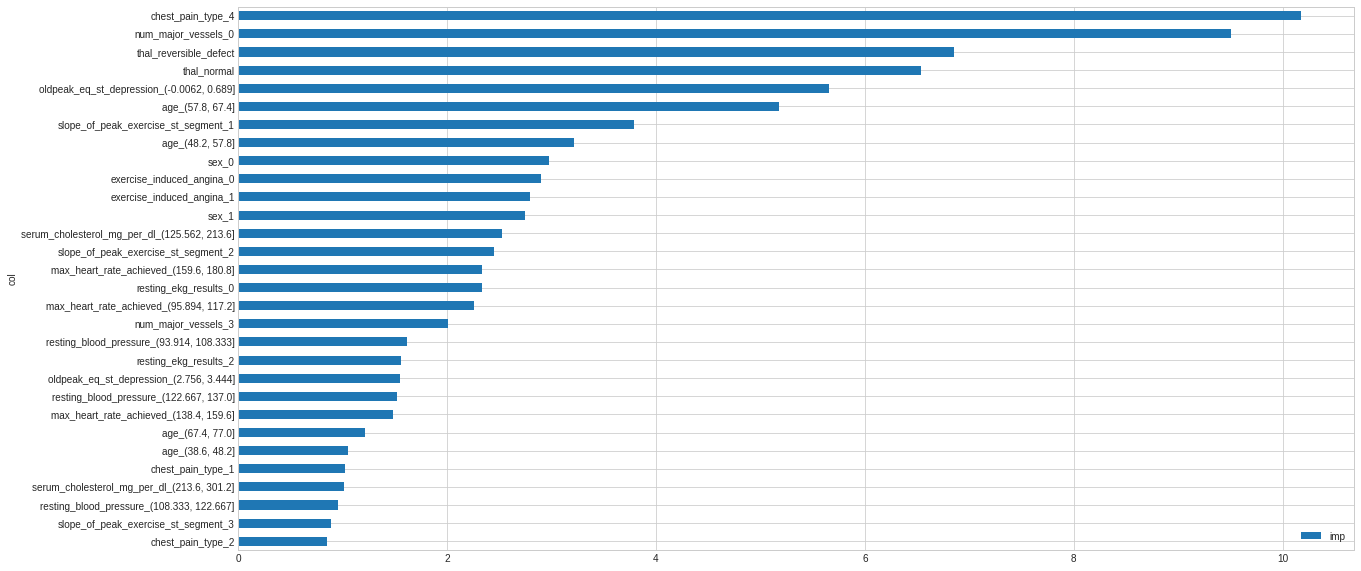

In [126]:
# Plot the feature importance scores
feature_importance(catboost_model, x_train)

# precision and recall

In [127]:

metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9713420440016005
Recall: 0.9182374999999999
F1: 0.9439968749892894
AUC: 0.9856320000000001


In [129]:

metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = .eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

AttributeError: ignored

# submission

In [81]:
x_train.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]"
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
test=test.drop('patient_id',axis=1)

In [87]:
test.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [88]:
# One-hot encode binned variables
pred_one_hot_cols = test.columns.tolist()
pred_enc = pd.get_dummies(test, columns=pred_one_hot_cols)
pred_enc.head()

,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,resting_blood_pressure_94,resting_blood_pressure_100,resting_blood_pressure_101,resting_blood_pressure_102,resting_blood_pressure_104,resting_blood_pressure_105,resting_blood_pressure_108,resting_blood_pressure_110,resting_blood_pressure_112,resting_blood_pressure_115,resting_blood_pressure_118,resting_blood_pressure_120,resting_blood_pressure_122,resting_blood_pressure_123,resting_blood_pressure_125,resting_blood_pressure_126,resting_blood_pressure_128,resting_blood_pressure_129,resting_blood_pressure_130,resting_blood_pressure_132,resting_blood_pressure_134,resting_blood_pressure_135,resting_blood_pressure_136,resting_blood_pressure_138,resting_blood_pressure_140,resting_blood_pressure_142,resting_blood_pressure_145,resting_blood_pressure_146,resting_blood_pressure_148,resting_blood_pressure_150,resting_blood_pressure_152,resting_blood_pressure_158,resting_blood_pressure_160,resting_blood_pressure_165,...,max_heart_rate_achieved_138,max_heart_rate_achieved_140,max_heart_rate_achieved_141,max_heart_rate_achieved_143,max_heart_rate_achieved_144,max_heart_rate_achieved_146,max_heart_rate_achieved_147,max_heart_rate_achieved_148,max_heart_rate_achieved_149,max_heart_rate_achieved_150,max_heart_rate_achieved_152,max_heart_rate_achieved_153,max_heart_rate_achieved_154,max_heart_rate_achieved_156,max_heart_rate_achieved_157,max_heart_rate_achieved_158,max_heart_rate_achieved_159,max_heart_rate_achieved_160,max_heart_rate_achieved_161,max_heart_rate_achieved_163,max_heart_rate_achieved_164,max_heart_rate_achieved_165,max_heart_rate_achieved_168,max_heart_rate_achieved_169,max_heart_rate_achieved_171,max_heart_rate_achieved_172,max_heart_rate_achieved_173,max_heart_rate_achieved_174,max_heart_rate_achieved_178,max_heart_rate_achieved_179,max_heart_rate_achieved_180,max_heart_rate_achieved_182,max_heart_rate_achieved_185,max_heart_rate_achieved_186,max_heart_rate_achieved_187,max_heart_rate_achieved_190,max_heart_rate_achieved_194,max_heart_rate_achieved_195,exercise_induced_angina_0,exercise_induced_angina_1
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [89]:
x_train.head()

,thal_fixed_defect,thal_normal,thal_reversible_defect,exercise_induced_angina_0,exercise_induced_angina_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,"age_(28.952, 38.6]","age_(38.6, 48.2]","age_(48.2, 57.8]","age_(57.8, 67.4]","age_(67.4, 77.0]","resting_blood_pressure_(93.914, 108.333]","resting_blood_pressure_(108.333, 122.667]","resting_blood_pressure_(122.667, 137.0]","resting_blood_pressure_(137.0, 151.333]","resting_blood_pressure_(151.333, 165.667]","resting_blood_pressure_(165.667, 180.0]","serum_cholesterol_mg_per_dl_(125.562, 213.6]","serum_cholesterol_mg_per_dl_(213.6, 301.2]","serum_cholesterol_mg_per_dl_(301.2, 388.8]","serum_cholesterol_mg_per_dl_(388.8, 476.4]","serum_cholesterol_mg_per_dl_(476.4, 564.0]","max_heart_rate_achieved_(95.894, 117.2]","max_heart_rate_achieved_(117.2, 138.4]","max_heart_rate_achieved_(138.4, 159.6]","max_heart_rate_achieved_(159.6, 180.8]","max_heart_rate_achieved_(180.8, 202.0]","oldpeak_eq_st_depression_(-0.0062, 0.689]","oldpeak_eq_st_depression_(0.689, 1.378]","oldpeak_eq_st_depression_(1.378, 2.067]","oldpeak_eq_st_depression_(2.067, 2.756]","oldpeak_eq_st_depression_(2.756, 3.444]","oldpeak_eq_st_depression_(3.444, 4.133]","oldpeak_eq_st_depression_(4.133, 4.822]","oldpeak_eq_st_depression_(4.822, 5.511]","oldpeak_eq_st_depression_(5.511, 6.2]"
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [0]:
# One hot encode the columns in the test data frame (like X_train)

test_embarked_one_hot = pd.get_dummies(test['thal'], 
                                       prefix='thal')

test_sex_one_hot = pd.get_dummies(test['chest_pain_type'], 
                                prefix='chest_pain_type')

test_plcass_one_hot = pd.get_dummies(test['	slope_of_peak_exercise_st_segment'], 
                                   prefix='	slope_of_peak_exercise_st_segment')

test_plcass_one_hot = pd.get_dummies(test['	slope_of_peak_exercise_st_segment'], 
                                   prefix='	slope_of_peak_exercise_st_segment')